#ЛР №6

Основные понятия ООП. Инкапсуляция. Классы. Декораторы.

##Основная задача "Эксперимент"

Нужно написать класс "Эксперимент", который производит работу с данными.

Вы получили данные в виде словаря. Словарь имеет следующую структуру {'date': '2023-01-05', 'signal': 'path_to_ecg_signal', 'parameters':{}}

**Интерфейс**

Нужно написать класс, где должны поддерживаться следующие методы:

* _конструктор_ — принимает словарь и создает соответствующие поля (self.data, self.path_signal, self.parameters)
* `get_datе()` — возвращает дату записи сигнала.
* `get_signal_length()` — возвращает длину сигнала.
* `plot_signal()` — выводит график сигнала.
* `_signal_filtration(signal, filtration_parametres)` — производит фильтрацию сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _signal_filtration и _signal_find_peak.
* `get_RR_statistics()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде словаря).
В этом методе вызывается метод _calculate_RR_intervals.


*можно добавить свои методы






Подгружаем библиотеки:

In [1]:
!pip install heartpy

In [2]:
!pip install wfdb

In [3]:
#модули, которые нам понадобятся
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


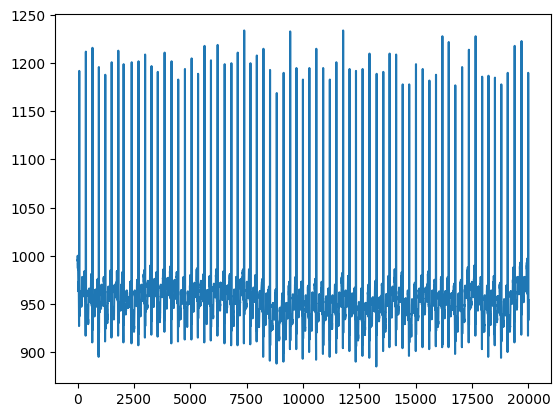

,Unnamed: 0,MLII
0,0,995
1,1,995
2,2,995
3,3,995
4,4,995


In [5]:
#загрузка сигнала из .csv файла с pandas
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Python-BMT-main/Python-BMT-main/Seminar6/ecg.csv')
plt.plot(df['MLII'])
plt.show()
df.head()

Данные успешно подгружаются

Примеры использования функций для обработки сигнала:

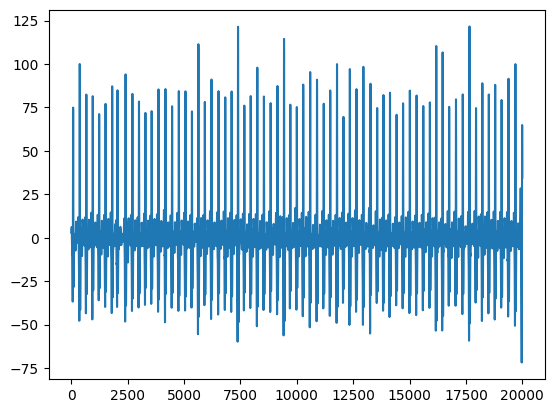

In [6]:
#фильтрация сигнала с библиотекой heartpy
filtered = hp.filter_signal(df['MLII'], cutoff = [0.75, 3.5], sample_rate = 100, order = 3, filtertype='bandpass')
plt.plot(filtered)
plt.show()

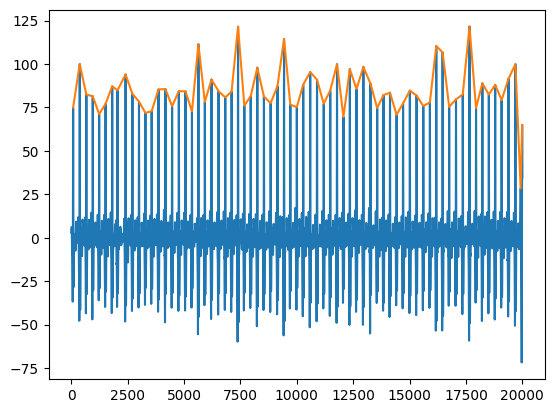

In [7]:
#поиск точек максимума с библиотекой scipy
peaks, _ = find_peaks(filtered, height=20)
plt.plot(filtered)
plt.plot(peaks, filtered[peaks])
plt.show()

Описание Класса

In [8]:
class Experiment:
  def __init__(self, data):
    self.data = data['date']
    self.path_signal = data['signal']
    self.parameters = data['parameters']
  def get_date(self):
    return self.data


  def get_signal_length(self):
    df=pd.read_csv(self.path_signal)
    return len (df)

  def plot_signal(self):
    df = pd.read_csv(self.path_signal)
    plt.plot(df['MLII'])
    plt.show()

  def _signal_filtration(self, signal, **filtration_parametres):
    filtered = hp.filter_signal(signal, **filtration_parametres)
    return filtered


  def _signal_find_peaks(self, filtered, **find_peaks_parametres):
    peaks, _ = find_peaks(filtered, **find_peaks_parametres)
    plt.plot(filtered)
    plt.plot(peaks, filtered[peaks])
    plt.show()
    return peaks.tolist()


  def _calculate_RR_intervals(self):
    df = pd.read_csv(self.path_signal)
    filtered = self._signal_filtration(df['MLII'], **self.parameters['filtration_parametres'])
    peaks = self._signal_find_peaks(filtered, **self.parameters['find_peaks_parametres'])
    new_array = []
    for i in range(len(peaks)-1):
      new_array.append(peaks[i+1]-peaks[i])

    return new_array

  def get_RR_statistics(self):
    RRs = self._calculate_RR_intervals()
    RR_statistics = {}
    RR_statistics['mean'] = np.mean(RRs)
    RR_statistics['std'] = np.std(RRs)
    RR_statistics['min'] = np.min(RRs)
    RR_statistics['max'] = np.max(RRs)
    return RR_statistics



Файл с ЭКГ сигналом (ecg.csv) в папке

Теперь используем его для создания класса Experiment:

In [9]:
experiment = Experiment(
    {'date': '2023-01-05',
      'signal': '/content/gdrive/MyDrive/Colab Notebooks/Python-BMT-main/Python-BMT-main/Seminar7/ecg.csv',
      'parameters': {'filtration_parametres': {'cutoff': [0.75, 3.5],
                                               'sample_rate': 100,
                                               'order': 3,
                                               'filtertype': 'bandpass'},
                     'find_peaks_parametres': {'height': 20}
                     }
    }
)


In [10]:
print(experiment.get_date())

2023-01-05


In [11]:
print(experiment.get_signal_length())

20000


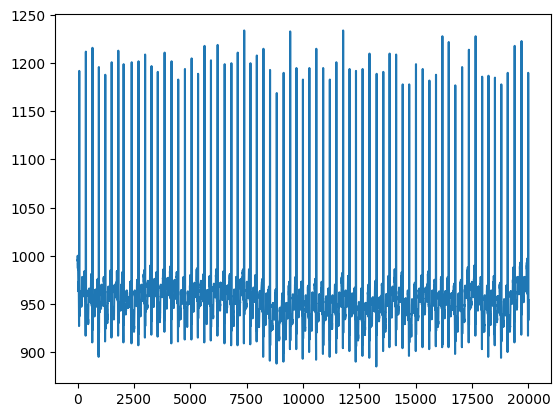

None


In [12]:
print(experiment.plot_signal())

In [13]:
filtered = experiment._signal_filtration(df['MLII'], cutoff = [0.75, 3.5], sample_rate = 100, order = 3, filtertype='bandpass')
print(filtered)

[ 2.93669971  3.29570764  3.6720113  ... 46.85395203 40.8126148
 34.54963788]


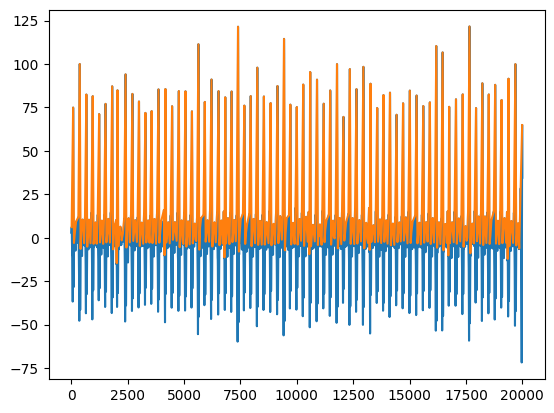

[11, 77, 114, 148, 207, 309, 370, 408, 439, 494, 564, 603, 663, 702, 737, 780, 848, 885, 947, 984, 1016, 1063, 1119, 1168, 1231, 1268, 1301, 1352, 1408, 1453, 1515, 1553, 1590, 1639, 1707, 1746, 1809, 1849, 1886, 1934, 1981, 2009, 2045, 2082, 2116, 2172, 2229, 2257, 2284, 2339, 2403, 2441, 2483, 2537, 2591, 2643, 2706, 2743, 2774, 2831, 2904, 2938, 2998, 3036, 3065, 3119, 3186, 3223, 3283, 3321, 3353, 3403, 3465, 3499, 3560, 3596, 3632, 3685, 3752, 3797, 3863, 3901, 3936, 3985, 4105, 4133, 4171, 4207, 4238, 4295, 4361, 4402, 4466, 4503, 4541, 4592, 4668, 4701, 4765, 4803, 4842, 4891, 4938, 4964, 4998, 5060, 5098, 5134, 5178, 5245, 5284, 5347, 5386, 5420, 5473, 5506, 5537, 5572, 5634, 5671, 5708, 5754, 5857, 5918, 5956, 5991, 6039, 6111, 6148, 6214, 6254, 6290, 6345, 6403, 6462, 6527, 6565, 6602, 6651, 6710, 6759, 6788, 6824, 6860, 6893, 6944, 7009, 7042, 7106, 7144, 7176, 7227, 7291, 7328, 7391, 7430, 7463, 7510, 7608, 7670, 7708, 7744, 7792, 7889, 7953, 7991, 8025, 8079, 8146, 8182, 8

In [14]:
print(experiment._signal_find_peaks(filtered))

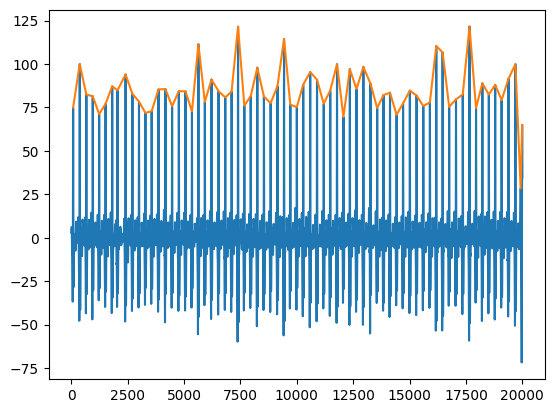

[293,
 293,
 284,
 284,
 284,
 294,
 236,
 358,
 303,
 292,
 285,
 277,
 303,
 308,
 295,
 299,
 295,
 287,
 287,
 284,
 296,
 313,
 297,
 282,
 285,
 279,
 283,
 293,
 293,
 298,
 304,
 290,
 279,
 288,
 284,
 309,
 303,
 298,
 288,
 301,
 285,
 284,
 295,
 305,
 317,
 295,
 280,
 289,
 292,
 288,
 300,
 299,
 297,
 293,
 283,
 282,
 290,
 303,
 300,
 299,
 290,
 280,
 287,
 282,
 285,
 307,
 305,
 233,
 66]

In [15]:
experiment._calculate_RR_intervals()

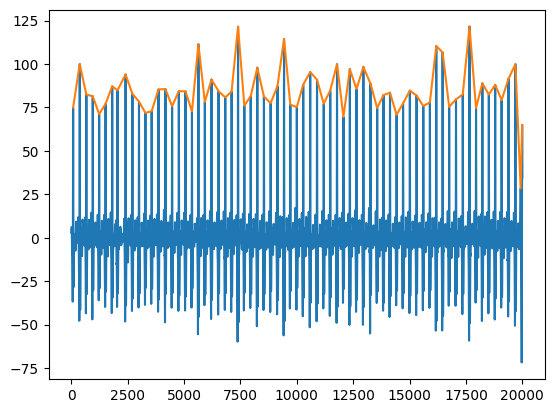

{'mean': 288.6231884057971, 'std': 31.077323597890175, 'min': 66, 'max': 358}

In [16]:
experiment.get_RR_statistics()

##Задача ** "Минигольф"

 в папке на githab